In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def display_img(img):
    fig=plt.figure(figsize=(12,8))
    ax=fig.add_subplot(111)
    ax.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()
    plt.close()

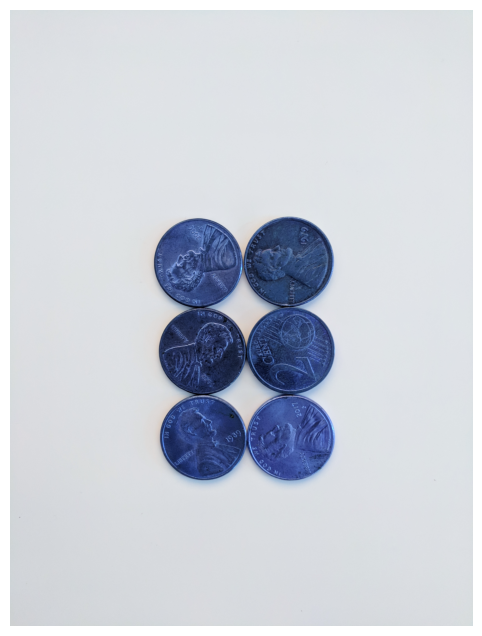

In [4]:
pennies_img = cv2.imread('Data/pennies.jpg')

display_img(pennies_img)

In [6]:
pennies_img.shape

(4048, 3036, 3)

## SEGMENTATION:

In [7]:
#Median blur-to help to get rid of unneccessary features-square kernel

#binary threshold - to make it black or white

#finding contours:
pennies_blur = cv2.medianBlur(pennies_img, 25)

pennies_blur.shape

(4048, 3036, 3)

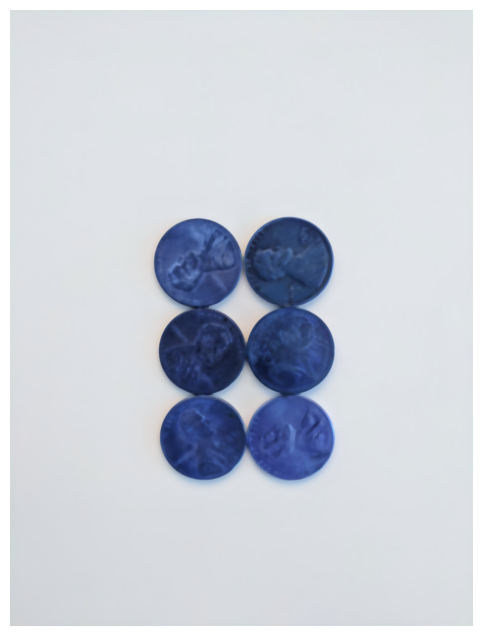

In [8]:
display_img(pennies_blur)

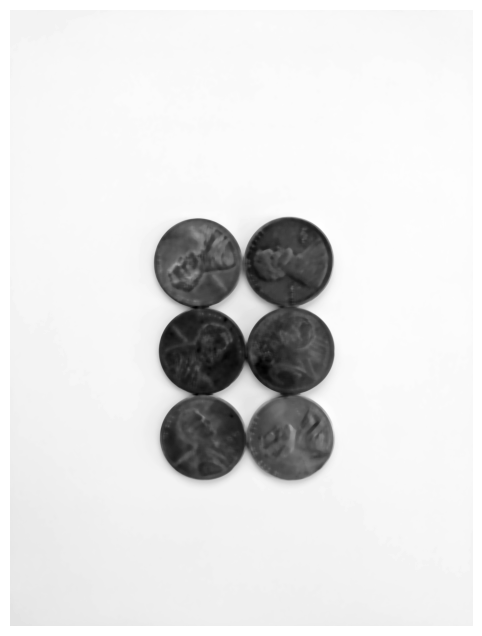

In [9]:
#displying blurred image.

#converting to gray

gray_pennies = cv2.cvtColor(pennies_blur, cv2.COLOR_BGR2GRAY)

display_img(gray_pennies)

In [10]:
gray_pennies.shape

(4048, 3036)

In [11]:
gray_pennies.max()

232

In [12]:
gray_pennies.min()

27

In [13]:
gray_pennies.mean()

205.55207275539377

In [14]:
#binary threshold - black and white's
#THRESH_BINARY_INV-to have white forground and black background

ret, sep_thresh = cv2.threshold(gray_pennies, 160, 255, cv2.THRESH_BINARY_INV)


In [15]:
sep_thresh

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [16]:
ret

160.0

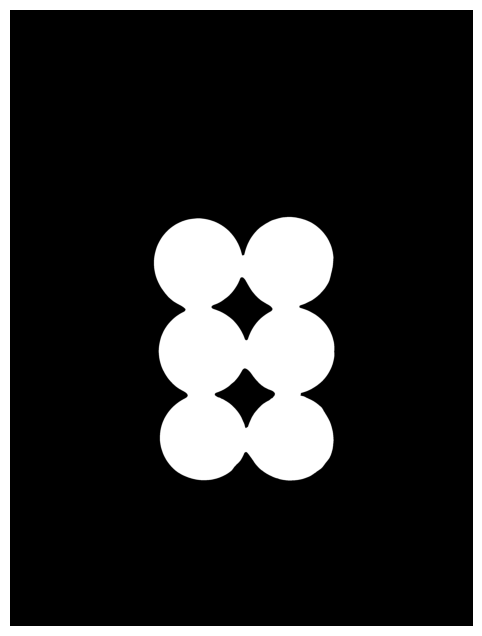

In [17]:
display_img(sep_thresh)

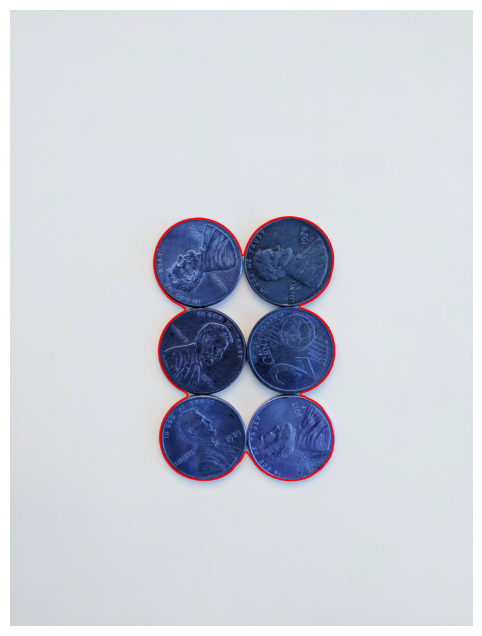

In [19]:
#contours

contours, hierarchy = cv2.findContours(sep_thresh.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(pennies_img, contours, i, (255,0,0), 10)
display_img(pennies_img)

In [20]:
#giant contour ignoring internal segmentation.

#now using water shed algorithm

### WATER SHED ALGORITHM:

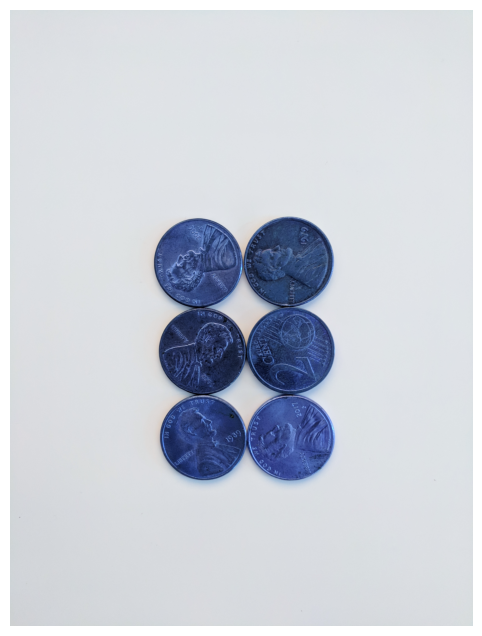

In [21]:
pennies_img = cv2.imread('Data/pennies.jpg')

display_img(pennies_img)

In [22]:
#Median blur-to help to get rid of unneccessary features-square kernel

pennies_blur = cv2.medianBlur(pennies_img, 35)

pennies_blur.shape

(4048, 3036, 3)

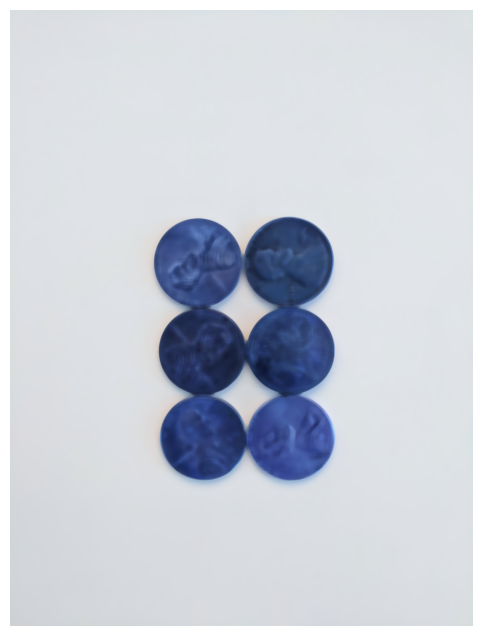

In [23]:
display_img(pennies_blur)

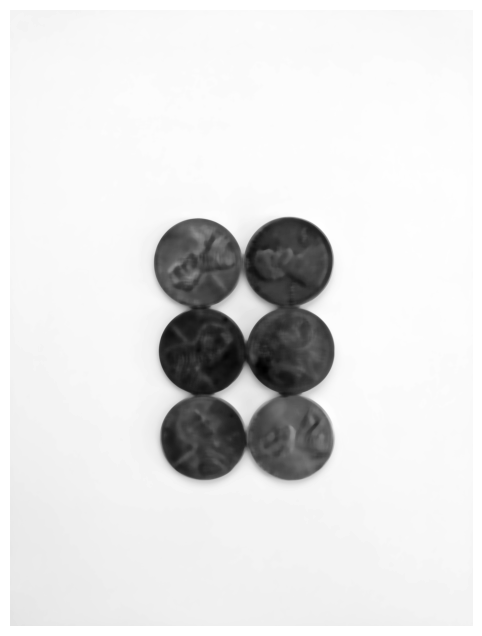

In [24]:
#converting to gray

gray_pennies = cv2.cvtColor(pennies_blur, cv2.COLOR_BGR2GRAY)

display_img(gray_pennies)

In [25]:

ret, sep_thresh = cv2.threshold(gray_pennies, 127, 255, cv2.THRESH_BINARY_INV)


In [26]:
ret

127.0

In [27]:
sep_thresh

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

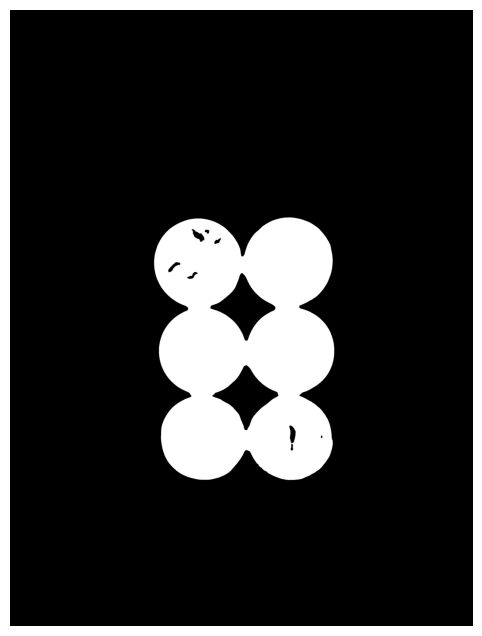

In [28]:
display_img(sep_thresh)

In [29]:
#using otsu method

ret_otsu, sep_thresh_otsu = cv2.threshold(gray_pennies, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)



In [30]:
ret_otsu

152.0

In [31]:
sep_thresh_otsu

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

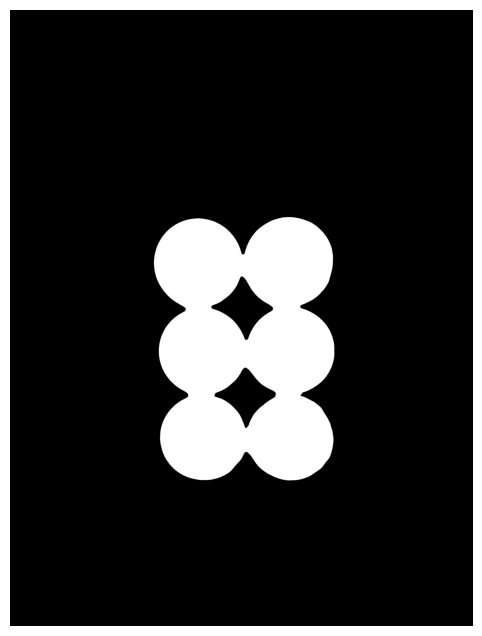

In [32]:
display_img(sep_thresh_otsu)

In [35]:
#still can't seperate without any erosion using otsu(advanced technique)

#removing noise:-morphological operator

kernel = np.ones((3,3), np.uint8)

kernel

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

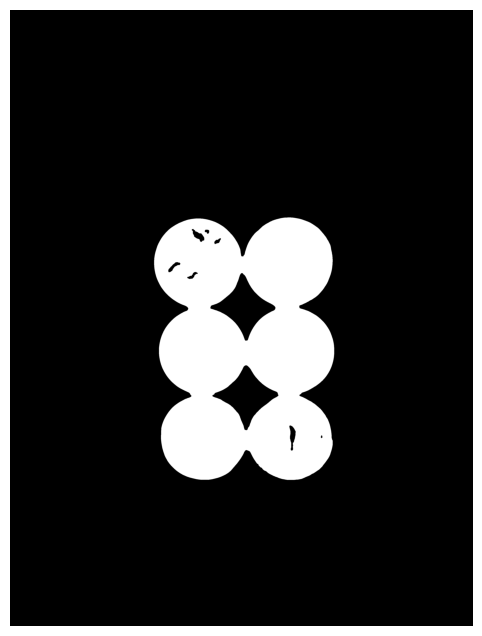

In [39]:
#opening:

opening = cv2.morphologyEx(sep_thresh, cv2.MORPH_OPEN, kernel, iterations=6)

display_img(opening)

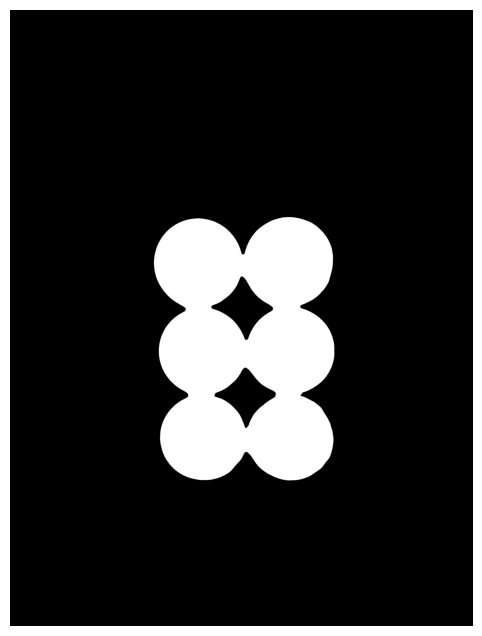

In [40]:
#opening:

opening_img = cv2.morphologyEx(sep_thresh_otsu, cv2.MORPH_OPEN, kernel, iterations=2)

display_img(opening_img)

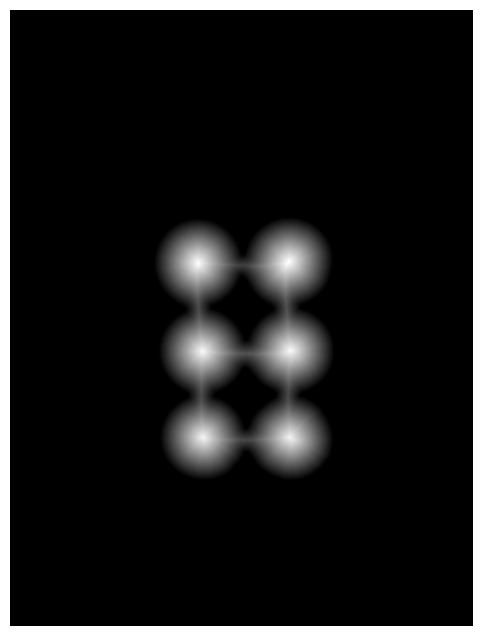

In [41]:
#section sor segments still connected
#setting seeds as segmenrts for foreground

dist_transform = cv2.distanceTransform(opening_img, cv2.DIST_L2, 5)

display_img(dist_transform)

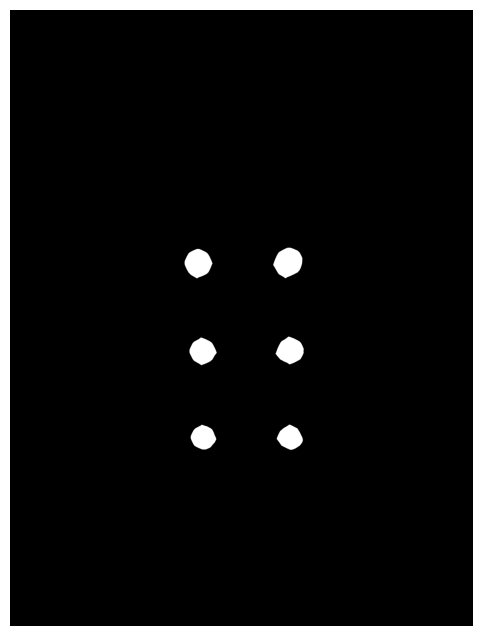

In [42]:
#thresholding - to grab only dots (lighter ones)

ret, thresh_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(), 255, 0)

display_img(thresh_fg)

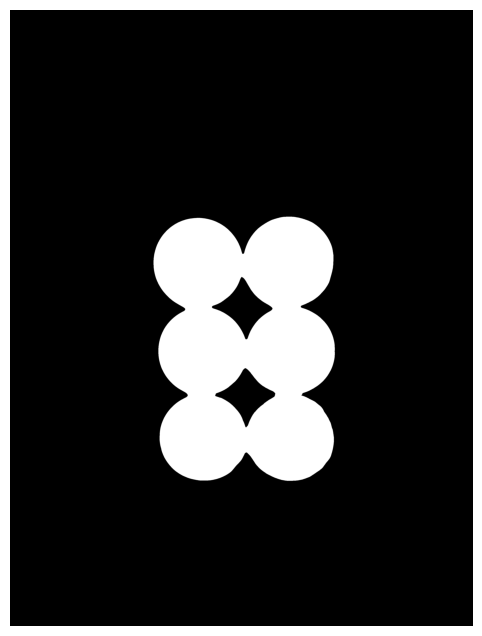

In [43]:
bg = cv2.dilate(opening_img, kernel, iterations=3)

display_img(bg)

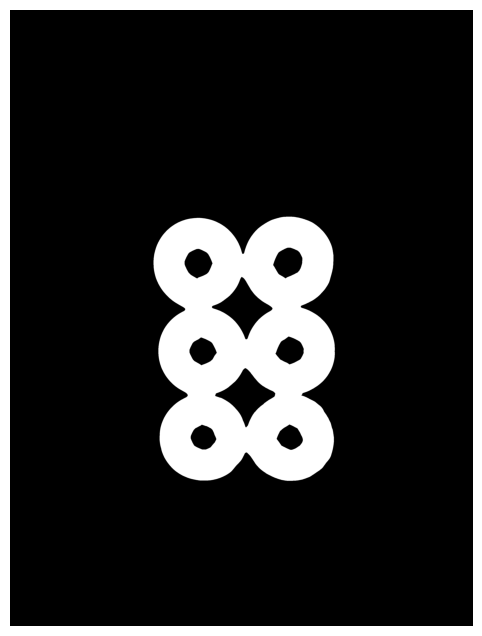

In [58]:
#now it is eroded but can clearly segment

#unklnown regions-close to backgrouynd

#finding unknown region-have sure forground and background

thresh_fg = np.uint8(thresh_fg)

unknown_reg = cv2.subtract(bg, thresh_fg)

display_img(unknown_reg)

In [59]:
#creating label markers - seeds

ret, markers = cv2.connectedComponents(thresh_fg)

#6 points feeded as seeds
markers

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

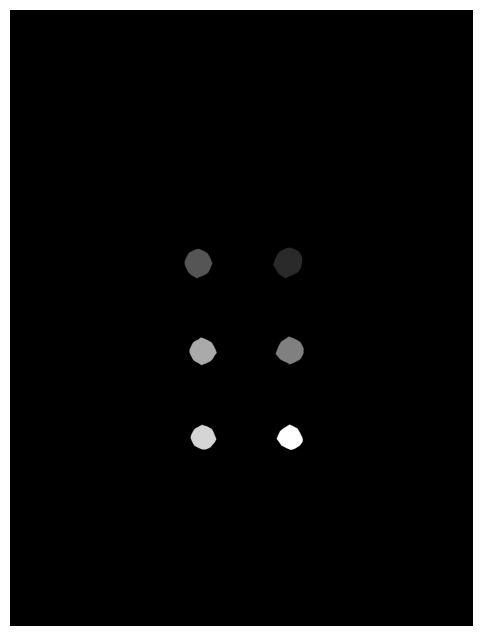

In [60]:
markers = markers+1
#background = 1

#unknown region -0

display_img(markers)

In [61]:

markers[unknown_reg==255] = 0
#making unknown white

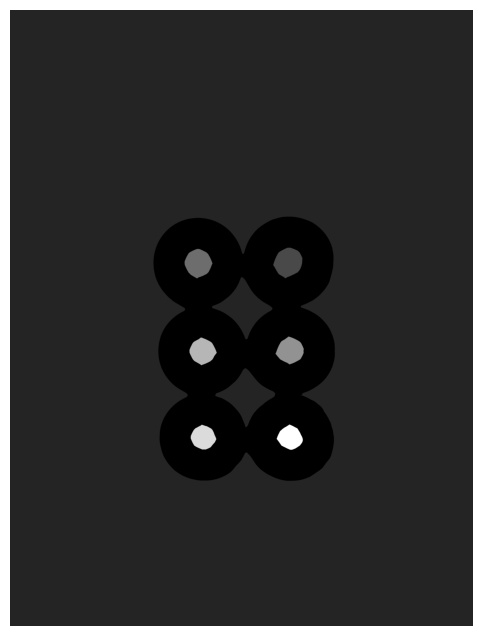

In [62]:
display_img(markers)

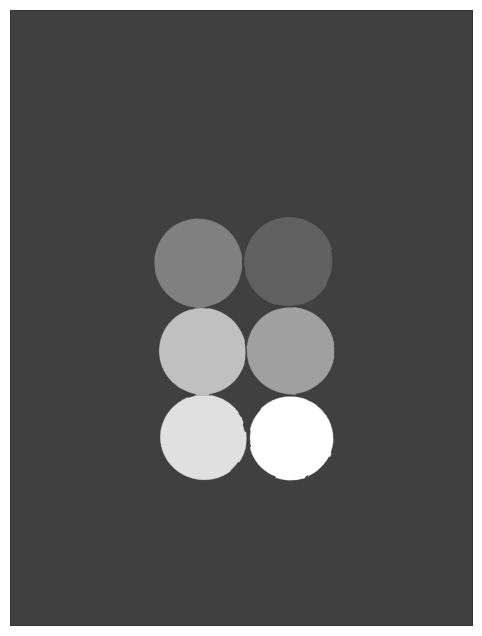

In [63]:
#this is all the background work

#now applying wAter shed algortuthm

markers_wsalg = cv2.watershed(pennies_img, markers)

display_img(markers_wsalg)

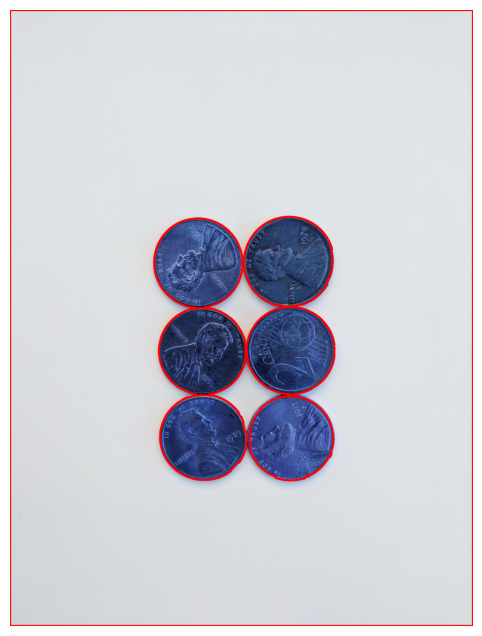

In [64]:
#contours

contours, hierarchy = cv2.findContours(markers_wsalg.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(pennies_img, contours, i, (255,0,0), 10)
display_img(pennies_img)